# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [5]:

set_count = 1
#set base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
city_data = []
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0:
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    city_url = f"{url}&q={city}"
    # Log the URL for verification
    print(f"Processing Record {record_count} of Set {set_count} | {city}: {city_url}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make API request
        response = requests.get(city_url)
        
        # Check if the response is successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City not found: {city}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error processing city {city}: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 0 of Set 2 | albany: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=albany
Processing Record 1 of Set 2 | luganville: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=luganville
Processing Record 2 of Set 2 | bethel: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=bethel
Processing Record 3 of Set 2 | talnakh: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=talnakh
Processing Record 4 of Set 2 | iqaluit: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=iqaluit
Processing Record 5 of Set 2 | ceeldheer: http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=89360f4c350336f7dd2b567af0060d80&q=ceeldheer
Processing Record 6 of Set 2 | puerto san carlos: http://api.openweathermap.org/data/2.5/weather?uni

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,13.63,94,31,4.42,US,1717826132
1,luganville,-15.5333,167.1667,26.21,78,83,4.92,VU,1717826414
2,bethel,41.3712,-73.4140,15.98,86,16,0.45,US,1717826414
3,talnakh,69.4865,88.3972,1.78,93,92,3.60,RU,1717826414
4,iqaluit,63.7506,-68.5145,-0.15,69,100,9.26,CA,1717826414


In [8]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/weatherpy_cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/weatherpy_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,13.63,94,31,4.42,US,1717826132
1,luganville,-15.5333,167.1667,26.21,78,83,4.92,VU,1717826414
2,bethel,41.3712,-73.4140,15.98,86,16,0.45,US,1717826414
3,talnakh,69.4865,88.3972,1.78,93,92,3.60,RU,1717826414
4,iqaluit,63.7506,-68.5145,-0.15,69,100,9.26,CA,1717826414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

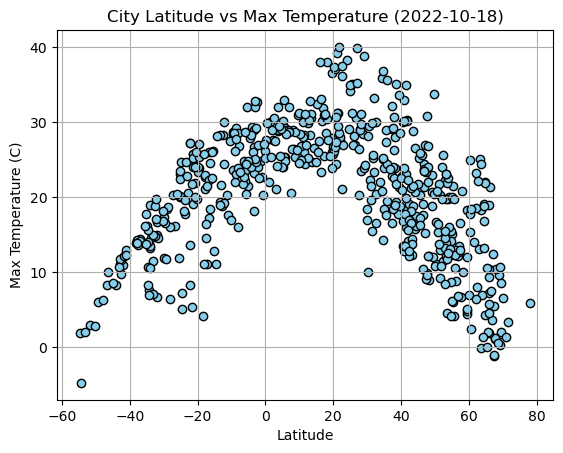

In [62]:
# Set the figure size before plotting
#plt.figure(figsize=(6.4, 4.8))

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, facecolors="skyblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')


# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Max Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

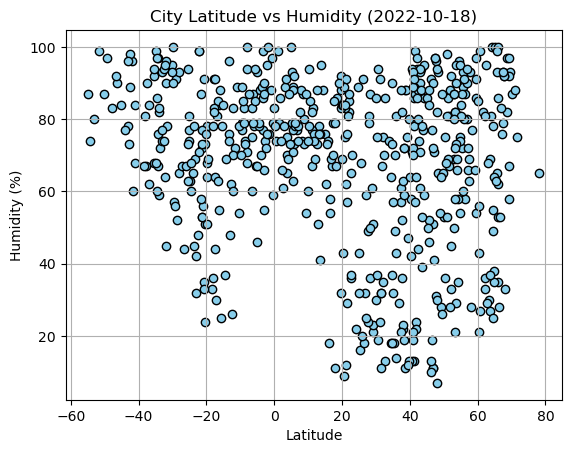

In [63]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,facecolors="skyblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

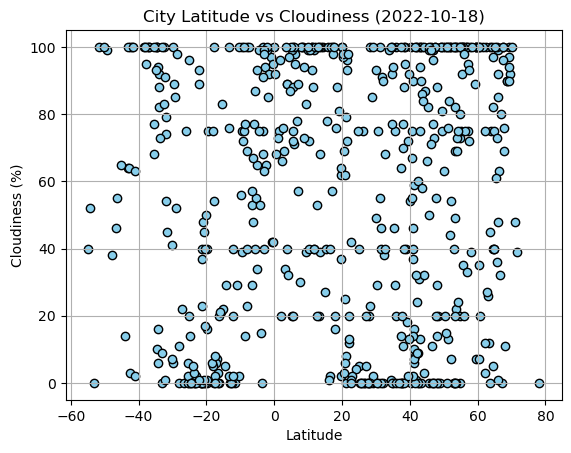

In [64]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,facecolors="skyblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

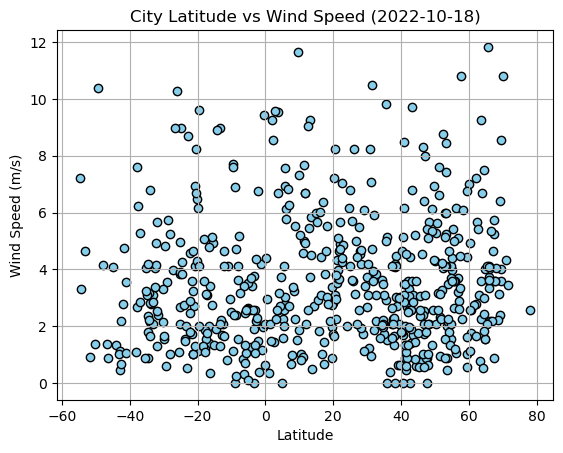

In [65]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,facecolors="skyblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, hemisphere):
    if hemisphere == "Northern": 
        pass  
    elif hemisphere == "Southern":
        pass
    else:
        print("Invalid hemisphere specified. Please choose 'Northern' or 'Southern'.")


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,13.63,94,31,4.42,US,1717826132
2,bethel,41.3712,-73.4140,15.98,86,16,0.45,US,1717826414
3,talnakh,69.4865,88.3972,1.78,93,92,3.60,RU,1717826414
4,iqaluit,63.7506,-68.5145,-0.15,69,100,9.26,CA,1717826414
5,ceeldheer,3.8488,47.1806,28.77,65,89,9.53,SO,1717826415


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luganville,-15.5333,167.1667,26.21,78,83,4.92,VU,1717826414
6,cacoal,-11.4386,-61.4472,20.33,72,0,0.81,BR,1717826415
12,antonio enes,-16.2325,39.9086,24.50,84,20,3.43,MZ,1717826416
13,invercargill,-46.4000,168.3500,10.01,90,55,0.88,NZ,1717826416
16,grytviken,-54.2811,-36.5092,-4.79,74,52,3.32,GS,1717826416


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7303008179984891


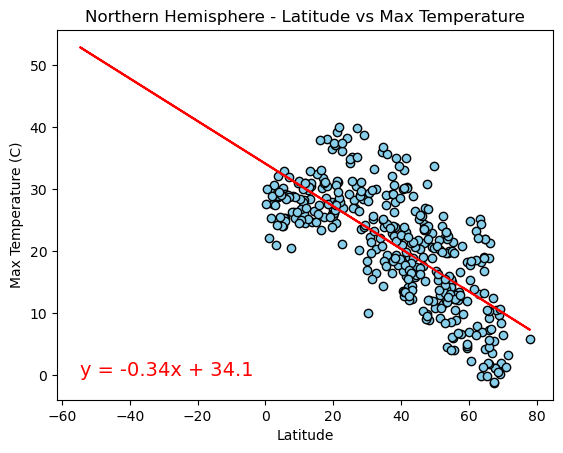

In [45]:
# Linear regression on Northern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate the regression line
regression_line = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Latitude vs Max Temperature')
print("The r-value is:", rvalue)

# Show the plot
plt.show()


The r-value is: 0.7724875842795169


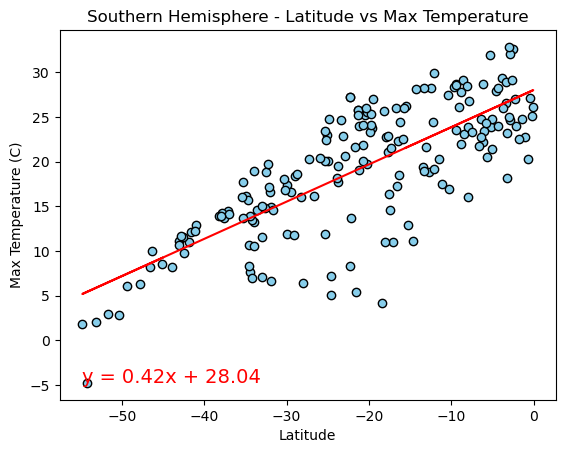

In [51]:
# Linear regression on Southern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate the regression line
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (southern_hemi_df['Lat'].min(), southern_hemi_df['Max Temp'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Latitude vs Max Temperature')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere where r=−0.7303, there is a moderately strong negative correlation between latitude and maximum temperature. This suggests that the higher the latitude, the maximum temperature tends to decrease.

For the Southern Hemisphere where r=0.7725, there is a moderately strong positive correlation between latitude and maximum temperature. This suggests that the lower latitude, the maximum temperature tends to increase.

There is a fairly strong linear relationship between latitude and maximum temperature, but the direction of the relationship differs between the hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03344994676539871


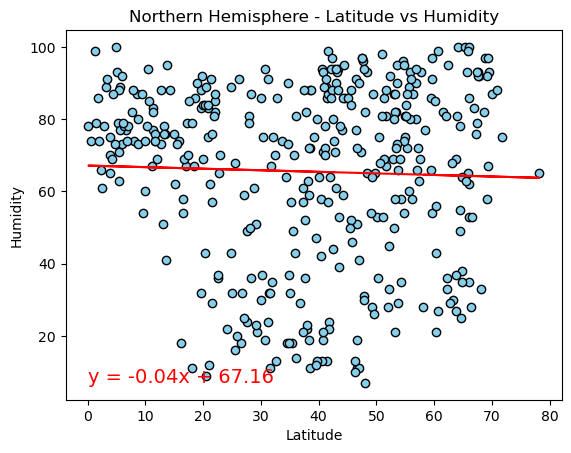

In [55]:
# Northern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate the regression line
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (northern_hemi_df['Lat'].min(), northern_hemi_df['Humidity'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Latitude vs Humidity')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

The r-value is: -0.09722780552353327


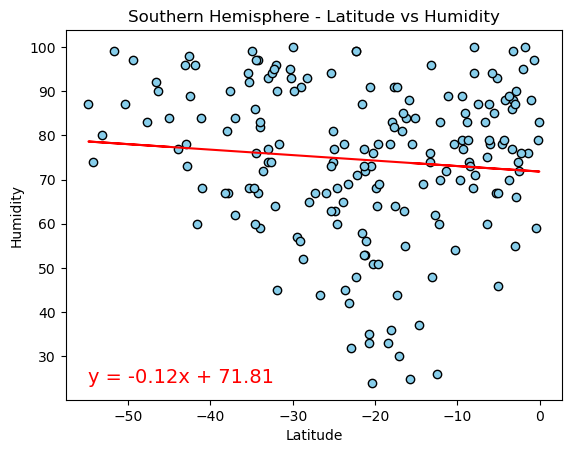

In [56]:
# Southern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate the regression line
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (southern_hemi_df['Lat'].min(), southern_hemi_df['Humidity'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Latitude vs Humidity')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere where r=−0.0334, there is a weak negative correlation between latitude and humidity. 

For the Southern Hemisphere where r=-0.0972, there is a weak positive correlation between latitude and humidity. 

In both cases, the r values suggest that latitude may not be a strong predictor of humidity in either hemisphere. There is very little tendency for humidity to decrease or increase as latitude changes

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0029327530260146875


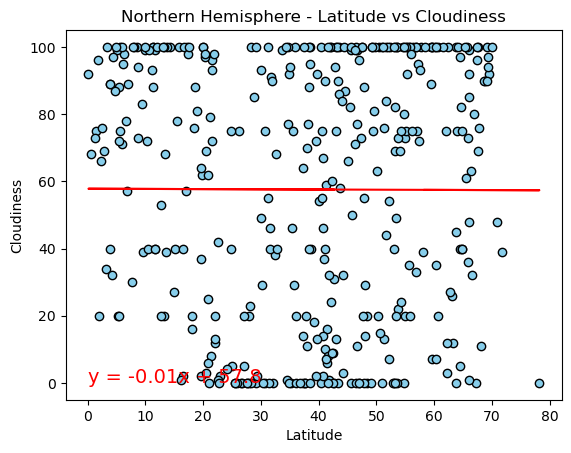

In [57]:
# Northern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate the regression line
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (northern_hemi_df['Lat'].min(), northern_hemi_df['Cloudiness'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Latitude vs Cloudiness')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

The r-value is: -0.02789931290717846


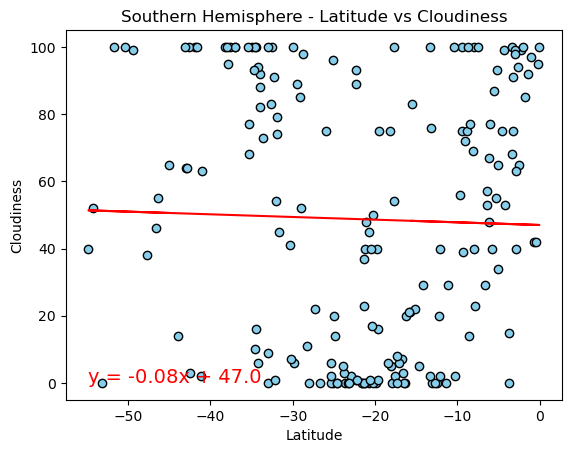

In [59]:
# Southern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate the regression line
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (southern_hemi_df['Lat'].min(), southern_hemi_df['Cloudiness'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Latitude vs Cloudiness')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere where r=−0.0029, there is a very weak negative correlation between latitude and cloudiness. This suggests that there is almost no tendency for cloudiness to decrease or increase as latitude changes in the Northern Hemisphere.

For the Southern Hemisphere where r=−0.0279, there is also a very weak negative correlation between latitude and cloudiness. This suggests that there is almost no tendency for humidity to decrease or increase as latitude changes in the Southern Hemisphere.

In both cases, as the r-values are extremely close to zero, it indicates extremely weak linear relationship between latitude and clodiness. This suggests that latitude is not a good predictor of cloudiness in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.057196096892242


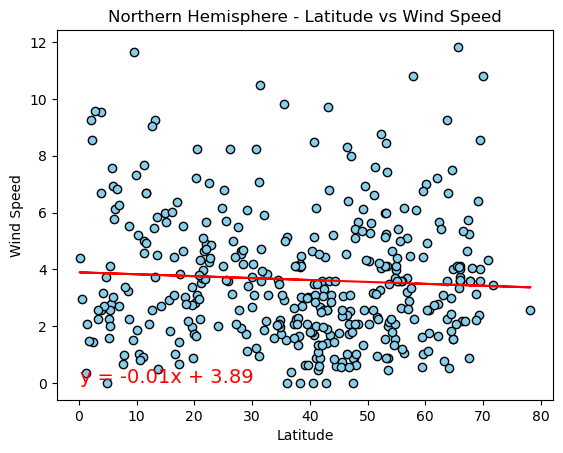

In [60]:
# Northern Hemisphere
# Calculate linear regression parameters
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate the regression line
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (northern_hemi_df['Lat'].min(), northern_hemi_df['Wind Speed'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs Wind Speed')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

The r-value is: -0.08569622233749377


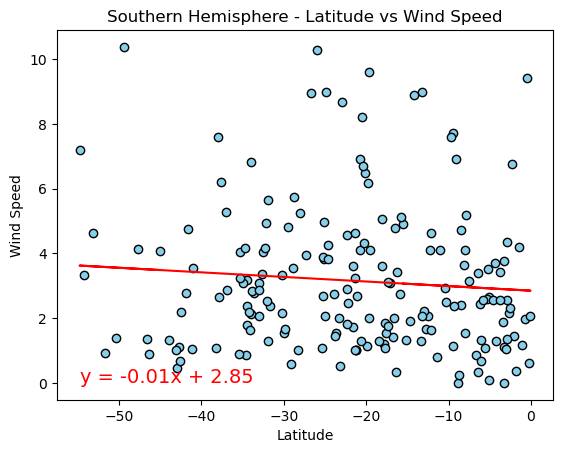

In [61]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate the regression line
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], facecolors="skyblue", edgecolors="black")

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regression_line, color='red')

# Create regression line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Annotate the regression line equation on the plot
plt.annotate(line_eq, (southern_hemi_df['Lat'].min(), southern_hemi_df['Wind Speed'].min()), fontsize=14, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Latitude vs Wind Speed')
print("The r-value is:", rvalue)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere where r=−0.0572, there is a very weak negative correlation between latitude and wind speed. This suggests that there is almost no tendency for wind speed to decrease or increase as latitude changes in the Northern Hemisphere.

For the Southern Hemisphere where r=−0.0857, there is also a very weak negative correlation between latitude and wind speed. This suggests that there is almost no tendency for wind speed to decrease or increase as latitude changes in the Southern Hemisphere.

In both cases, as the r-values are close to zero, it indicates weak linear relationship between latitude and wind speed. This suggests that latitude is not a good predictor of wind speed in either hemisphere. 